In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder # is to convert the word into some value which is randomly assigned by the label encoder.
from sklearn.feature_extraction.text import CountVectorizer # for converting text into tokens.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
data = pd.read_csv('/content/2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv') # Read the data set.

In [ ]:
data.head() # is to print first 5 values from dataset.

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [ ]:
data.info # it shows the information of the dataset.

<bound method DataFrame.info of        Unnamed: 0     id                                               text  \
0               1  10000  It should be legal for a husband to rape his wife   
1               2  10001                            dalits are lowlife scum   
2               3  10002                                dalits are lowlives   
3               4  10003  It was a better world when women dare not ques...   
4               5  10004  I don't work this hard so that those immigrant...   
...           ...    ...                                                ...   
40618       40736   9995  we should forcibly remove all the foreigners f...   
40619       40737   9996  we should forcibly remove all the immigrants f...   
40620       40738   9997               dalits are unworthy of the Gods love   
40621       40739   9998                               dalits are worthless   
40622       40740   9999       dalits are deserves to be treated as lowlife   

      label      ty

In [ ]:
data.shape

(40623, 11)

In [ ]:
data.describe(include='all')

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
count,40623.000000,40623,40623,40623,40623,26097,26097.000000,40623,40623,40623,40623
unique,NaN,40623,40463,2,7,2,NaN,2,5,3,20
top,NaN,10000,Blacks are such pondlife,hate,none,True,NaN,dynabench entry,1,train,gnzuctwed3
freq,NaN,1,6,22124,18499,15436,NaN,26097,11542,32497,6733
mean,20371.983236,NaN,NaN,NaN,NaN,NaN,0.585455,NaN,NaN,NaN,NaN
std,11743.590183,NaN,NaN,NaN,NaN,NaN,0.448801,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,NaN
25%,10206.500000,NaN,NaN,NaN,NaN,NaN,0.036560,NaN,NaN,NaN,NaN
50%,20374.000000,NaN,NaN,NaN,NaN,NaN,0.910290,NaN,NaN,NaN,NaN
75%,30534.500000,NaN,NaN,NaN,NaN,NaN,0.995500,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'text', 'label', 'type', 'model_wrong',
       'db.model_preds', 'status', 'round', 'split', 'annotator'],
      dtype='object')

In [ ]:
data.isna().sum() # count the number of missing values in each column

Unnamed: 0            0
id                    0
text                  0
label                 0
type                  0
model_wrong       14526
db.model_preds    14526
status                0
round                 0
split                 0
annotator             0
dtype: int64

In [ ]:
data.drop(columns = ['Unnamed: 0'], axis = 1 , inplace = True) #removed unnamed
data.head()

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65406 entries, 0 to 65405
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65406 non-null  object
 1   label   65406 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1022.1+ KB


In [ ]:
data['id'].dtype

dtype('O')

In [ ]:
for i in data.columns:
    print(i,":",data[str(i)].isnull().sum()/data.shape[0])

id : 0.0
text : 0.0
label : 0.0
type : 0.0
model_wrong : 0.35758068089505946
db.model_preds : 0.35758068089505946
status : 0.0
round : 0.0
split : 0.0
annotator : 0.0


In [ ]:
data.dropna(axis = 0,inplace = True)
for i in data.columns:
    print(i,":",data[str(i)].isnull().sum()/data.shape[0])

id : 0.0
text : 0.0
label : 0.0
type : 0.0
model_wrong : 0.0
db.model_preds : 0.0
status : 0.0
round : 0.0
split : 0.0
annotator : 0.0


In [ ]:
data.groupby('type').count()['id']

type
animosity          1121
dehumanization      390
derogation         5377
none              10844
notgiven           7645
support              70
threatening         650
Name: id, dtype: int64

In [ ]:
data['type'].nunique()

7

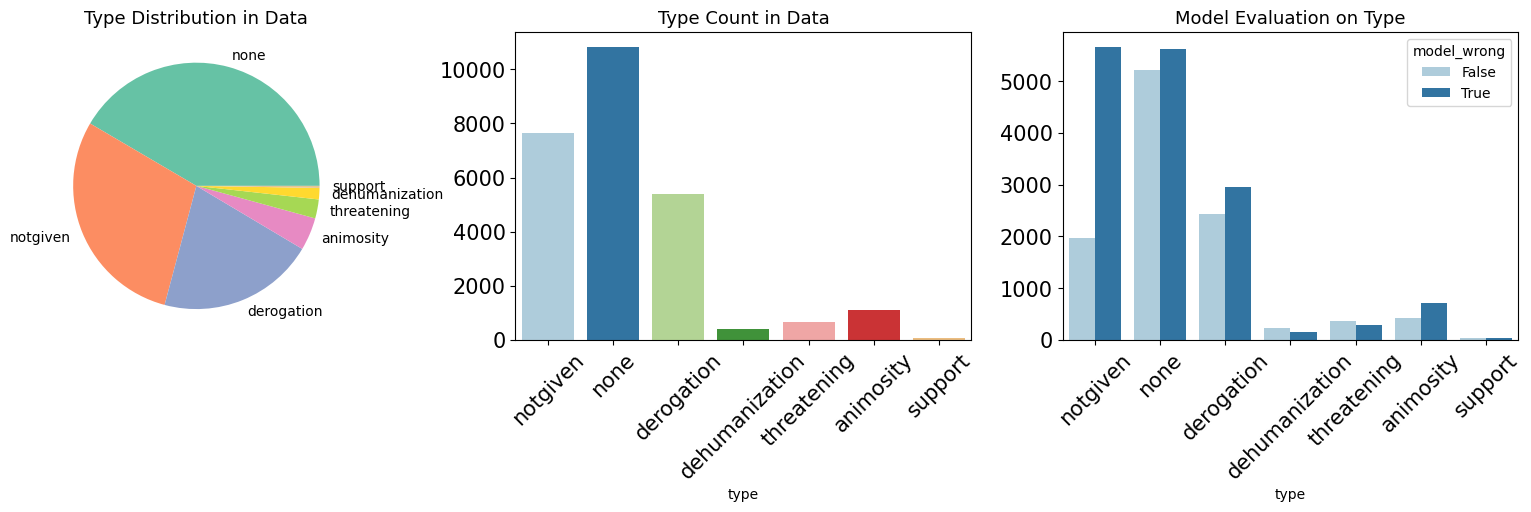

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols = 3, figsize = (20,4) , dpi = 100)
#plt.tight_layout()

colors = ['#66c2a5', '#fc8d62' , '#8da0cb' ,'#e78ac3' , '#a6d854' , '#ffd92f','#e5c494']
data['type'].value_counts().plot(kind = 'pie',ax = ax[0], labels = data['type'].value_counts().index , colors = colors)
sns.countplot(x = 'type',data = data , ax = ax[1] , palette = 'Paired')
sns.countplot(x = 'type' , data = data , hue = 'model_wrong', palette = 'Paired')

for i in range(3):
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelsize=15 , rotation = 45)
    ax[i].tick_params(axis='y', labelsize=15)

ax[0].set_title('Type Distribution in Data', fontsize=13)
ax[1].set_title('Type Count in Data', fontsize=13)
ax[2].set_title('Model Evaluation on Type', fontsize = 13)

plt.show()

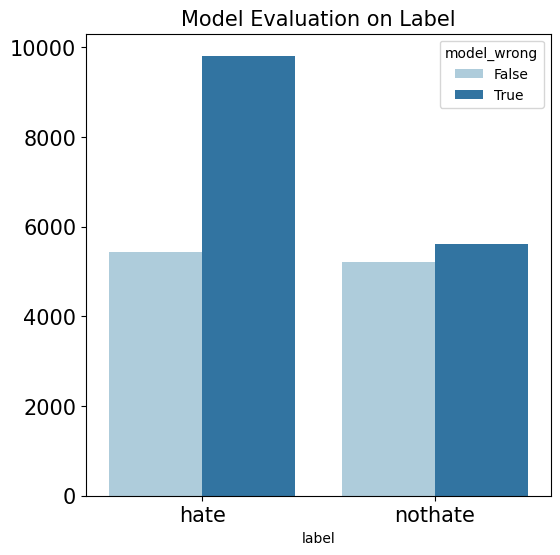

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'label' , data = data, hue = 'model_wrong' , palette = 'Paired')
plt.ylabel("")
plt.tick_params(axis = 'x',labelsize = 15)
plt.tick_params(axis = 'y',labelsize = 15)
plt.title("Model Evaluation on Label" , fontsize = 15)
plt.show()

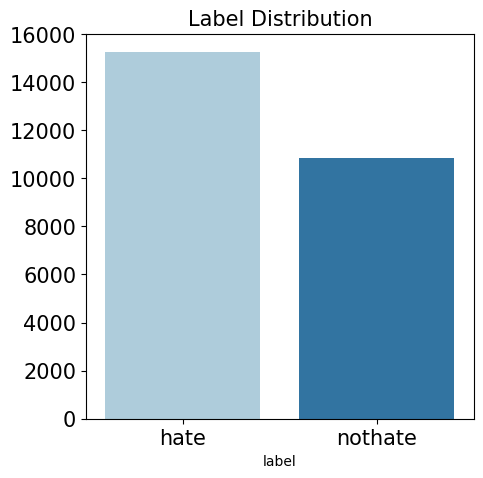

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'label' , data = data, palette = 'Paired')
plt.ylabel("")
plt.tick_params(axis = 'x',labelsize = 15)
plt.tick_params(axis = 'y',labelsize = 15)
plt.title("Label Distribution" , fontsize = 15)
plt.show()

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 11.2 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import contractions
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_clean(text):
    # changing to lower case
    lower = text.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
data['text_clean'] = text_clean(data['text'])

<ipython-input-23-5930dfc3c7a1>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-23-5930dfc3c7a1>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-23-5930dfc3c7a1>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-23-5930dfc3c7a1>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-23-5930dfc3c7a1>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [ ]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [ ]:
data.label.value_counts()

0    15253
1    10844
Name: label, dtype: int64

In [ ]:
data.head()

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,text_clean
0,10000,It should be legal for a husband to rape his wife,0,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,it should be legal for a husband to rape his wife
1,10001,dalits are lowlife scum,0,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,dalits are lowlife scum
2,10002,dalits are lowlives,0,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,dalits are lowlives
3,10003,It was a better world when women dare not ques...,0,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3,it was a better world when women dare not ques...
4,10004,I don't work this hard so that those immigrant...,0,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,i don t work this hard so that those immigrant...


In [ ]:
x = data['text_clean']
y= data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False,stop_words='english')
x_train = hvectorizer.fit_transform(x_train).toarray()
x_test = hvectorizer.transform(x_test).toarray()

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

34630    0
24935    0
23202    0
23872    0
30592    1
        ..
38768    1
40446    0
2089     1
35163    1
4896     0
Name: label, Length: 18267, dtype: int64

In [ ]:
#plt.scatter(data.text_clean , data.label , marker='+' , color = 'red')

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix :\n",cm)

# find accuracy_score
from sklearn.metrics import accuracy_score
print("the Accuracy of given model:",accuracy_score(y_test, y_pred)*100)







Confusion matrix :
 [[4135  441]
 [ 670 2584]]
the Accuracy of given model: 85.8109833971903


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
result = classifier.predict(hvectorizer.transform(['''Blacks are disgusting ''']))
if result==0:
    print("The Entered Text is Detected as Hate Speech")
else:
    print("The Entered Text is Detected as NO-Hate Speech")

The Entered Text is Detected as Hate Speech


In [ ]:
result = classifier.predict(hvectorizer.transform(['''He is a good guy with great heart.''']))
if result==0:
    print("The Entered Text is Detected as Hate Speech")
else:
    print("The Entered Text is Detected as No-Hate Speech")

The Entered Text is Detected as No-Hate Speech


In [ ]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix :\n",cm)

# find accuracy_score
from sklearn.metrics import accuracy_score
print("the Accuracy of given model:",accuracy_score(y_test, y_pred)*100)

Confusion matrix :
 [[3884  692]
 [ 692 2562]]
the Accuracy of given model: 82.32439335887611


In [ ]:
# RANDOM FOREST --
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
RF.fit(x_train, y_train)

# Make predictions on the testing data
predictions_rf = RF.predict(x_test)
print(predictions_rf, "\n")

val6 = (accuracy_score(y_test, predictions_rf)*100)
print('Accuracy:', val6, "\n")

print("*Confusion Matrix for Random Forest: ")
print(confusion_matrix(y_test, predictions_rf))

[0 0 1 ... 1 0 0] 

Accuracy: 85.74712643678161 

*Confusion Matrix for Random Forest: 
[[4127  449]
 [ 667 2587]]


In [ ]:
result = dt.predict(hvectorizer.transform([''' ''']))
if result==0:
    print("The Entered Text is Detected as Hate Speech")
else:
    print("The Entered Text is Detected as No-Hate Speech")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix :\n",cm)

# find accuracy_score
from sklearn.metrics import accuracy_score
print("the Accuracy of given model:",accuracy_score(y_test, y_pred)*100)

Confusion matrix :
 [[4012  564]
 [ 763 2491]]
the Accuracy of given model: 83.05236270753512


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb = adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix :\n",cm)
# find accuracy_score
from sklearn.metrics import accuracy_score
print("the Accuracy of given model:",accuracy_score(y_test, y_pred)*100)

Confusion matrix :
 [[4287  289]
 [1618 1636]]
the Accuracy of given model: 75.64495530012772


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10000))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# from keras.optimizers import SGD
# Compiling the aNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
# fit the model to the training data
history=model.fit(x_train, y_train,epochs=7, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
acc_ann = np.mean(history.history['val_accuracy'])

acc_ann = acc_ann*100
print('The accuracy obtained by Ann model :',acc_ann)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                160016    
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 160,193
Trainable params: 160,193
Non-tr